# brazil-covid-19

Import section:

In [60]:
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Variables section:

In [61]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
today_minimum_number_of_cases_to_analize = 2000

Configs section:

In [62]:
seaborn.set_style("dark")
seaborn.set_context("talk")

Data cleaning:

In [71]:
data = pandas.read_csv(url)
data = data.drop(['Lat', 'Long','Province/State'], axis=1)
data = data[~data['Country/Region'].str.contains("China")]
brazil_data = data[data["Country/Region"].str.match('Brazil')]
data = data[data[data.columns[-1]] > today_minimum_number_of_cases_to_analize]
data = data.append(brazil_data, ignore_index=True)
data = data.melt(id_vars=['Country/Region'], var_name='date', value_name='qty')
data = data.rename(columns={"Country/Region": "country"})
data = data.sort_values(by=['country'])
data['date']= pandas.to_datetime(data['date']) 
data['qty'] = data['qty'].astype(int)
data = data[data['qty'] > 30]

In [72]:
data.describe

<bound method NDFrame.describe of             country       date   qty
652         Austria 2020-03-16  1018
628         Austria 2020-03-14   655
616         Austria 2020-03-13   504
520         Austria 2020-03-05    41
604         Austria 2020-03-12   302
..              ...        ...   ...
621  United Kingdom 2020-03-13   798
657  United Kingdom 2020-03-16  1543
537  United Kingdom 2020-03-06   163
585  United Kingdom 2020-03-10   382
573  United Kingdom 2020-03-09   321

[237 rows x 3 columns]>

In [73]:
data.dtypes

country            object
date       datetime64[ns]
qty                 int64
dtype: object

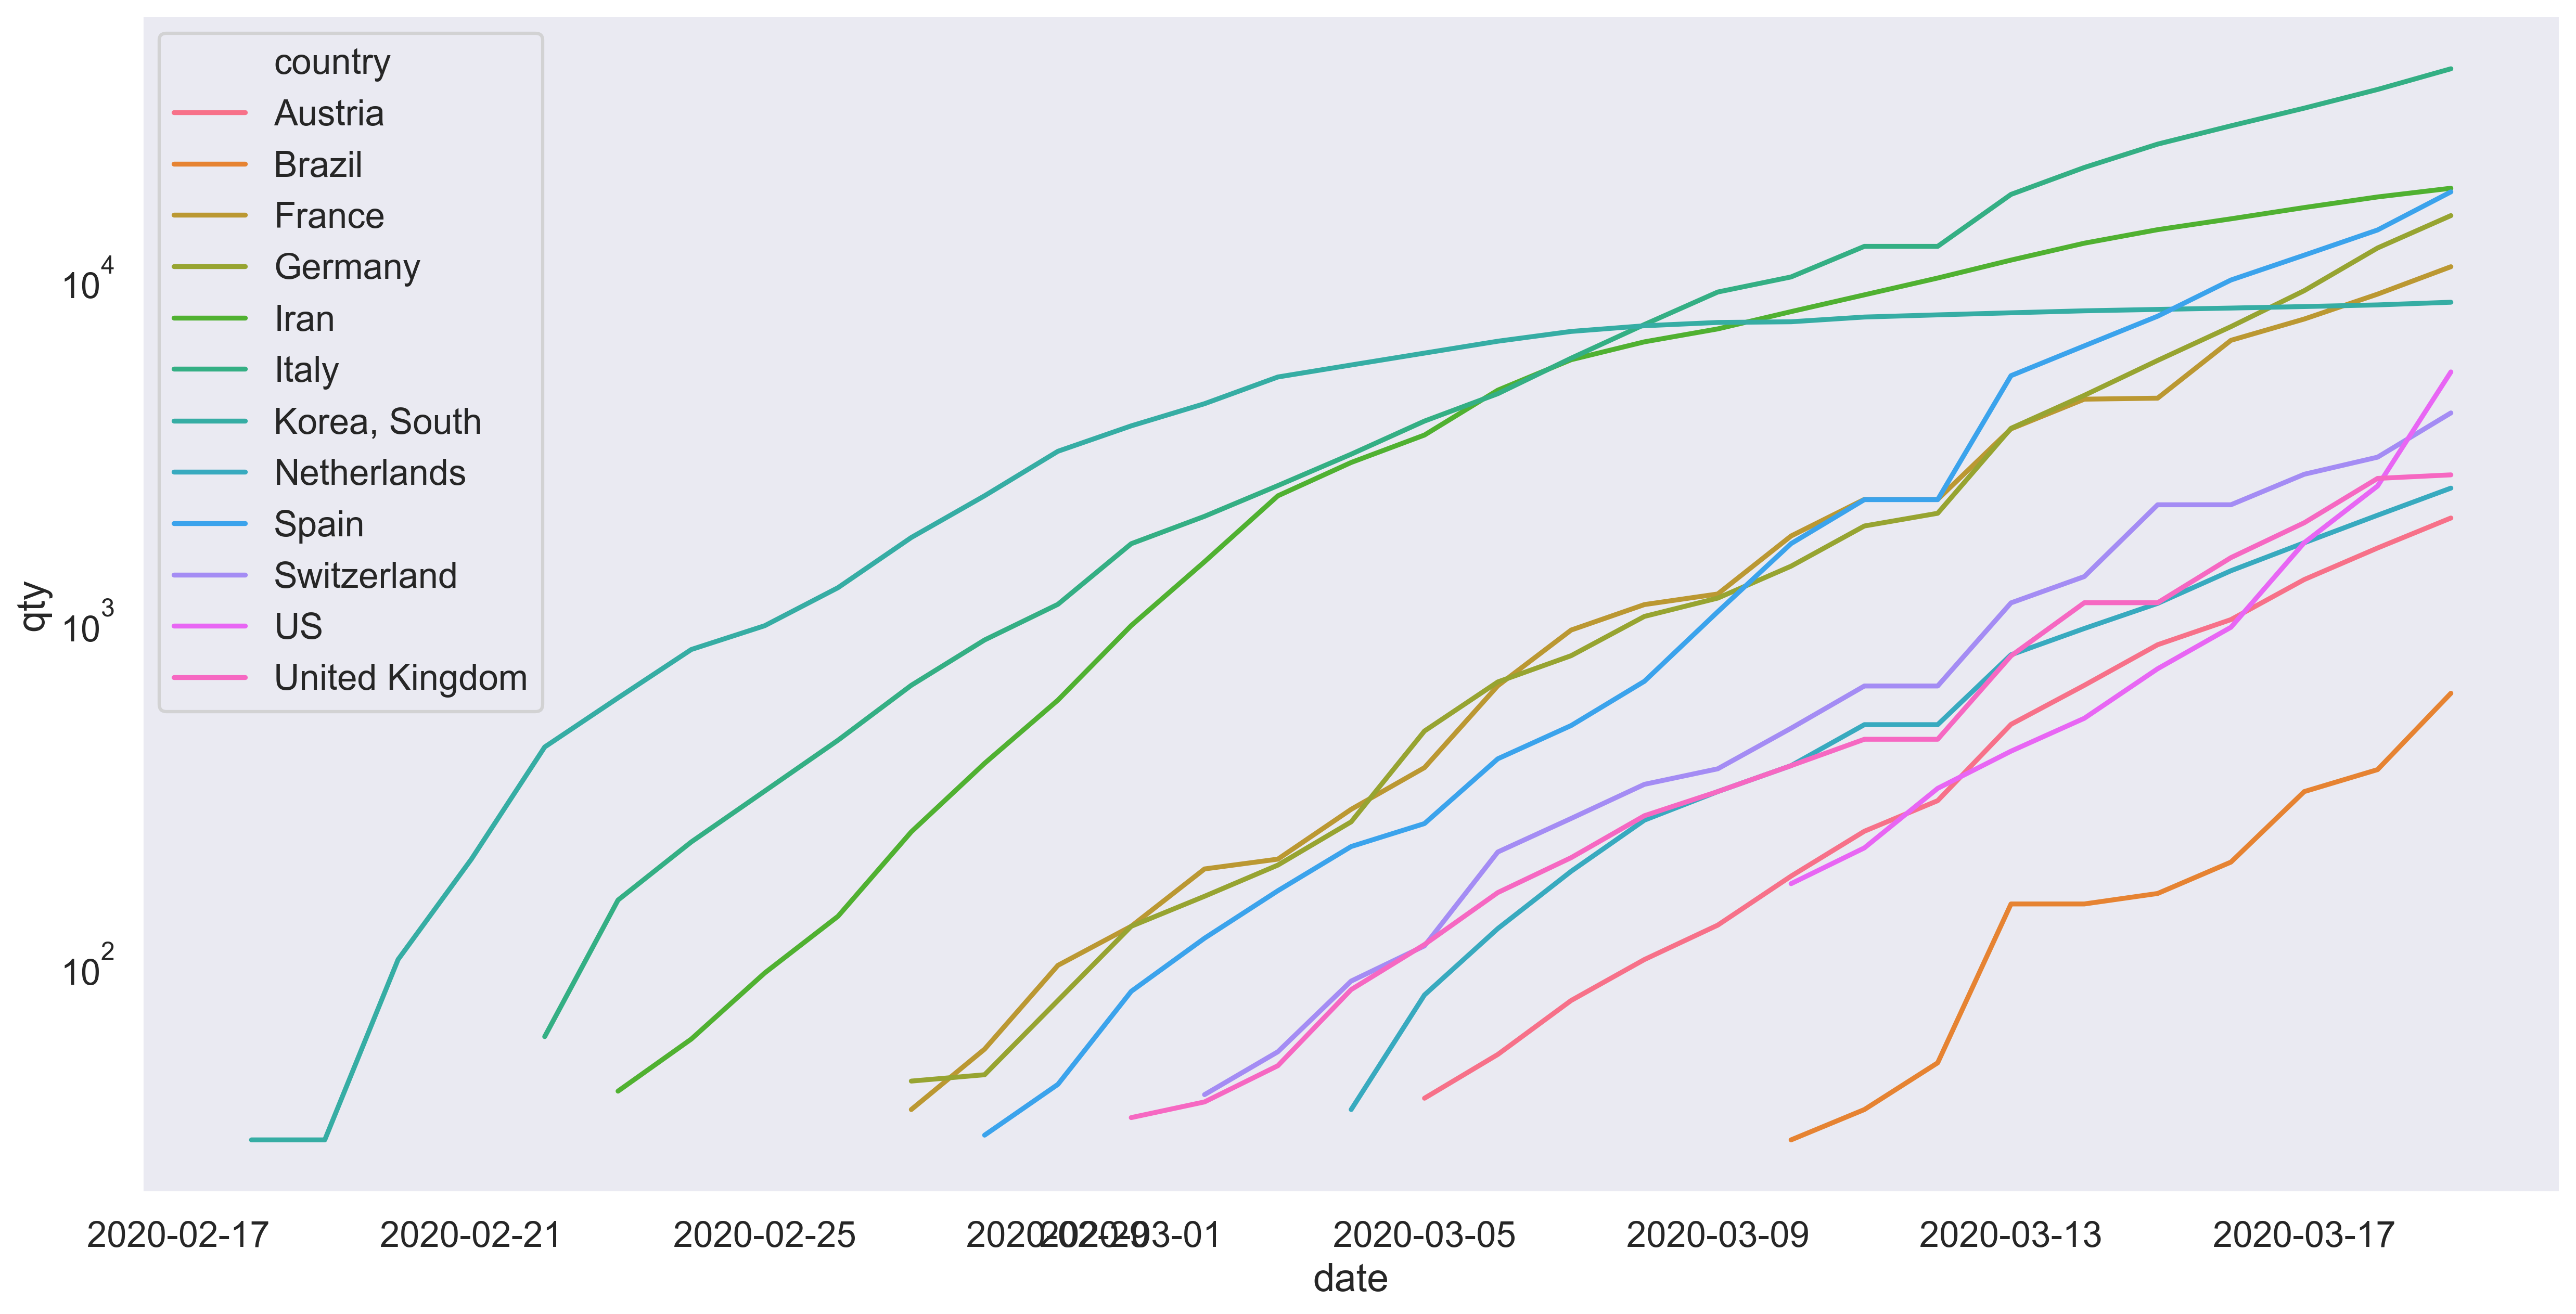

In [74]:
fig, ax = pyplot.subplots(figsize=(20,10), dpi=300)
ax.set(yscale="log")
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country")